Используемые библиотеки:

In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import math

Исходные функции:

In [2]:
def f(x):
    return x**2 + 2*x + 1

def g(x):
    return np.sin(x) + np.cos(2*x)

Реализация методов нахождения производной при фиксированном значении шага:

In [3]:
def right_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def left_diff(f, x, h):
    return (f(x) - f(x - h)) / h

def center_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

Аналитические производные исходных функций:

In [4]:
def df(x):
    return 2*x + 2

def dg(x):
    return np.cos(x) - 2*np.sin(2*x)

Вычисление аналитических производных
исходных функций, построение их графиков.


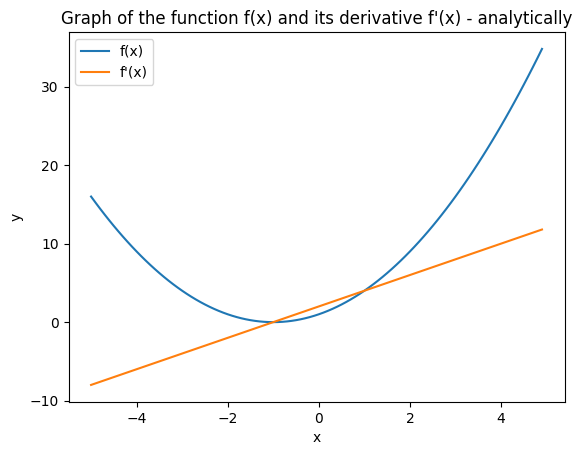

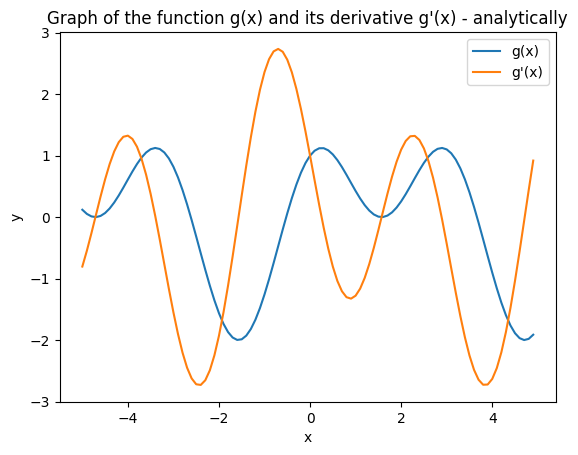

In [5]:
# Creating an array of points x from -5 to 5 with a step of 0.1
x = np.arange(-5, 5, 0.1)

# Calculating the values of the functions f and g at each point
y_f = f(x)
y_g = g(x)

# Calculating the values of the derivatives f'(x) and g'(x) at each point
y_df = df(x)
y_dg = dg(x)

# Plotting the function f(x) and its derivative f'(x)
fig, ax = plt.subplots()
ax.plot(x, y_f, label='f(x)')
ax.plot(x, y_df, label="f'(x)")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Graph of the function f(x) and its derivative f\'(x) - analytically')
ax.legend()

# Plotting the function g(x) and its derivative g'(x)
fig2, ax2 = plt.subplots()
ax2.plot(x, y_g, label='g(x)')
ax2.plot(x, y_dg, label="g'(x)")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Graph of the function g(x) and its derivative g\'(x) - analytically')
ax2.legend()

# Displaying graphs
plt.show()

Вычисленние значения численной производной в узлах сетки и построение графиков.


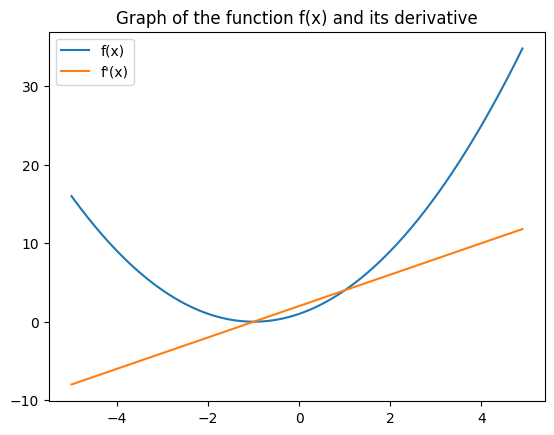

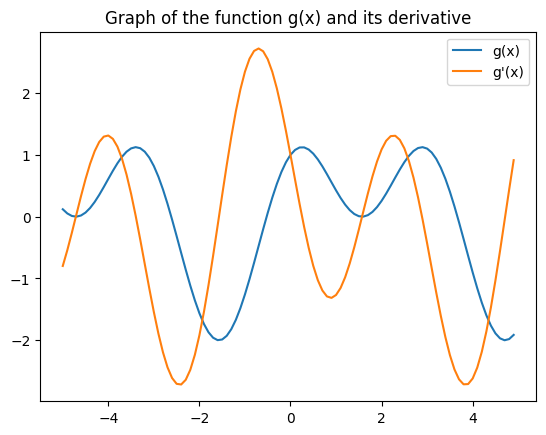

In [6]:
# Creating an array of points x from -5 to 5 with a step of 0.1
x = np.arange(-5, 5, 0.1)

# Calculating the values of the functions f and g at each point
y_f = f(x)
y_g = g(x)

# Calculating the values of the numerical derivatives of the functions f and g in the nodes of the grid
h = 0.1
df_f = [center_diff(f, xi, h) for xi in x]
df_g = [center_diff(g, xi, h) for xi in x]

# Creating the first graph for the function f(x)
fig, ax = plt.subplots()
ax.plot(x, y_f, label='f(x)')
ax.plot(x, df_f, label='f\'(x)')
ax.legend()
ax.set_title('Graph of the function f(x) and its derivative')

# Creating a second graph for the function g(x)
fig, ax = plt.subplots()
ax.plot(x, y_g, label='g(x)')
ax.plot(x, df_g, label='g\'(x)')
ax.legend()
ax.set_title('Graph of the function g(x) and its derivative')

# Displaying graphs
plt.show()

Нахожждение среднеквадратичных отклоненний численных от истинных значений
производной:

In [7]:
# Creating an array of points x from -5 to 5 with a step of 0.1
x = np.arange(-5, 5, 0.1)

# Calculating the true values of the derivatives of the functions f and g at each point
df_f_true = 2*x + 2
df_g_true = np.cos(x) - 2*np.sin(2*x)

# Calculating the values of the numerical derivatives of the functions f and g in the nodes of the grid
h = 0.1
df_f_num = [center_diff(f, xi, h) for xi in x]
df_g_num = [center_diff(g, xi, h) for xi in x]

# Calculating the standard deviations of the numerical derivatives from the true values
msd_f = np.sqrt(np.mean((df_f_true - df_f_num)**2))
msd_g = np.sqrt(np.mean((df_g_true - df_g_num)**2))

print(f"Standard deviation of the numerical derivative of the function f(x): {msd_f}")
print(f"Standard deviation of the numerical derivative of the function g(x): {msd_g}")


Standard deviation of the numerical derivative of the function f(x): 1.51055910063722e-14
Standard deviation of the numerical derivative of the function g(x): 0.009262320135061447


График зависимости среднеквадратичного отклонения от величины шага:

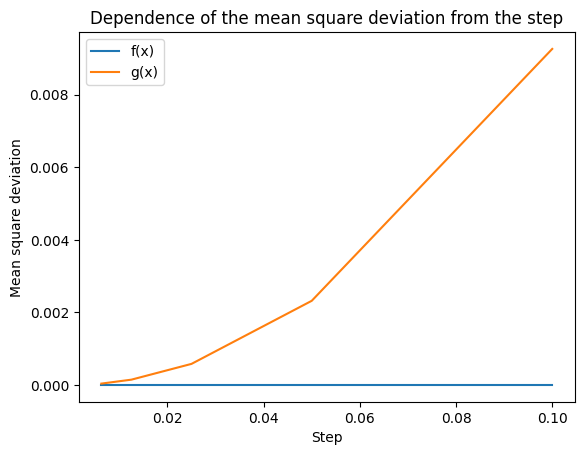

In [8]:
# Creating an array of points x from -5 to 5 with a step of 0.1
x = np.arange(-5, 5, 0.1)

# Calculating the true values of the derivatives of the functions f and g at each point
df_f_true = 2*x + 2
df_g_true = np.cos(x) - 2*np.sin(2*x)

# Creating a list of steps
steps = [0.1, 0.05, 0.025, 0.0125, 0.00625]

# Create lists to store the mean square deviation for each step
msd_f_list = []
msd_g_list = []

for h in steps:
    # Calculate the values of the numerical derivatives of the functions f and g in the nodes of the grid
    df_f_num = [center_diff(f, xi, h) for xi in x]
    df_g_num = [center_diff(g, xi, h) for xi in x]

    # Calculate the mean square deviation of the numerical derivatives from the true values
    mse_f = np.sqrt(np.mean((df_f_true - df_f_num)**2))
    mse_g = np.sqrt(np.mean((df_g_true - df_g_num)**2))

   # Add values to the lists
    msd_f_list.append(mse_f)
    msd_g_list.append(mse_g)

# Creating graph of the dependence of the mean square deviation on the step value
plt.plot(steps, msd_f_list, label="f(x)")
plt.plot(steps, msd_g_list, label="g(x)")
plt.xlabel("Step")
plt.ylabel("Mean square deviation")
plt.title("Dependence of the mean square deviation from the step")
plt.legend()
plt.show()


Реализация методово численного интегрирования:

In [9]:
# Rectangular rule integration function
def rectangular_rule(f, a, b, n):
    # Calculating step size
    h = (b - a) / n
    # Initializing integral value
    integral = 0
    # Iterating over all intervals
    for i in range(n):
        # Calculating x value for current interval
        x = a + i * h
        # Adding value of function at current point to integral
        integral += f(x)
    # Multiplying by step size to get integral value
    integral *= h
    return integral

# Trapezoidal rule integration function
def trapezoidal_rule(f, a, b, n):
    # Calculating step size
    h = (b - a) / n
    # Initializing integral value as average of values at the endpoints
    integral = 0.5 * (f(a) + f(b))
    # Iterating over all intervals, starting from the second one
    for i in range(1, n):
        # Calculating x value for current interval
        x = a + i * h
        # Adding value of function at current point multiplied by 2 to integral
        integral += f(x) * 2
    # Multiplying by step size divided by 2 to get integral value
    integral *= h / 2
    return integral

# Simpson's rule integration function
def simpsons_rule(f, a, b, n):
    # Calculating step size
    h = (b - a) / n
    # Initializing integral value as sum of values at endpoints
    integral = f(a) + f(b)
    # Iterating over all intervals, starting from the second one
    for i in range(1, n):
        # Calculating x value for current interval
        x = a + i * h
        # If interval number is even, add value of function at current point multiplied by 2 to integral
        if i % 2 == 0:
            integral += f(x) * 2
        # If interval number is odd, add value of function at current point multiplied by 4 to integral
        else:
            integral += f(x) * 4
    # Multiplying by step size divided by 3 to get integral value
    integral *= h / 3
    return integral

Задаем параметры для функции f(x) и количество интервалов:

In [10]:
a, b = 0, 1
n = 1000

Выводим результаты вычисления определенного интеграла для функции f(x):

In [11]:
print("Analytic:", integrate.quad(f, a, b)[0])
print("Rectangular rule:", rectangular_rule(f, a, b, n))
print("Trapezoidal rule:", trapezoidal_rule(f, a, b, n))
print("Simpson's rule:", simpsons_rule(f, a, b, n))

Analytic: 2.3333333333333335
Rectangular rule: 2.3318334999999983
Trapezoidal rule: 2.332083499999998
Simpson's rule: 2.333333333333333


Задаем параметры для функции g(x) и количество интервалов:

In [12]:
a, b = 0, math.pi/2
n = 1000

Выводим результаты вычисления определенного интеграла для функции g(x):

In [13]:
print("Analytic:", integrate.quad(g, a, b)[0])
print("Rectangular rule:", rectangular_rule(g, a, b, n))
print("Trapezoidal rule:", trapezoidal_rule(g, a, b, n))
print("Simpson's rule:", simpsons_rule(g, a, b, n))

Analytic: 0.9999999999999999
Rectangular rule: 1.0007851925466316
Trapezoidal rule: 0.9996070953015354
Simpson's rule: 1.0000000000000338


Построение графика зависимости отклонения численного ответа от аналитического от величины шага:

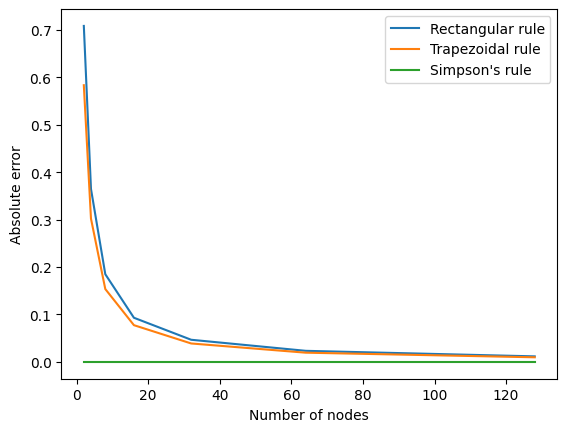

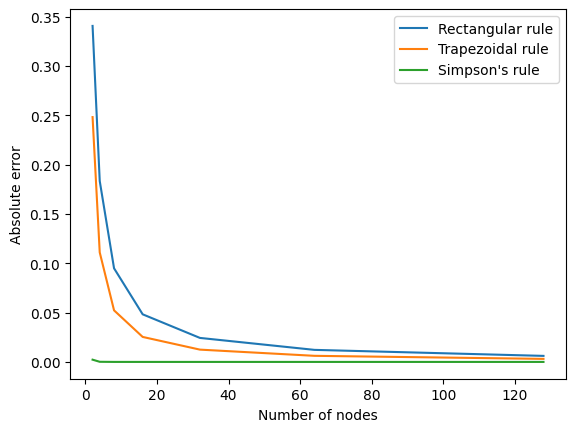

In [14]:
def compare_methods(f, a, b, n_list):
    analytic = integrate.quad(f, a, b)[0]
    rectangular_errors = []
    trapezoidal_errors = []
    simpsons_errors = []

    for n in n_list:
        rectangular = rectangular_rule(f, a, b, n)
        trapezoidal = trapezoidal_rule(f, a, b, n)
        simpsons = simpsons_rule(f, a, b, n)
        rectangular_errors.append(abs(rectangular - analytic))
        trapezoidal_errors.append(abs(trapezoidal - analytic))
        simpsons_errors.append(abs(simpsons - analytic))

    plt.plot(n_list, rectangular_errors, label="Rectangular rule")
    plt.plot(n_list, trapezoidal_errors, label="Trapezoidal rule")
    plt.plot(n_list, simpsons_errors, label="Simpson's rule")
    plt.xlabel("Number of nodes")
    plt.ylabel("Absolute error")
    plt.legend()
    plt.show()

n_list = [128, 64, 32, 16, 8, 4, 2]
compare_methods(f, 0, 1, n_list)
compare_methods(g, 0, math.pi/2, n_list)